<a href="https://colab.research.google.com/github/hatiff/TinyRoMa_satelite_matching/blob/main/Tiny_roma_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hatiff/TinyRoMa_satelite_matching
%cd TinyRoMa_satelite_matching
!pip install -r requirements.txt
#Why Tiny-RoMa? This model offers strong performance while still being able to run at a decent speed on a CPU, making it both capable and efficient for resource-limited environments.

Cloning into 'TinyRoMa_satelite_matching'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 86 (delta 31), reused 53 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 14.97 MiB | 31.67 MiB/s, done.
Resolving deltas: 100% (31/31), done.
/content/TinyRoMa_satelite_matching
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.7 MB/s eta 0:00:00


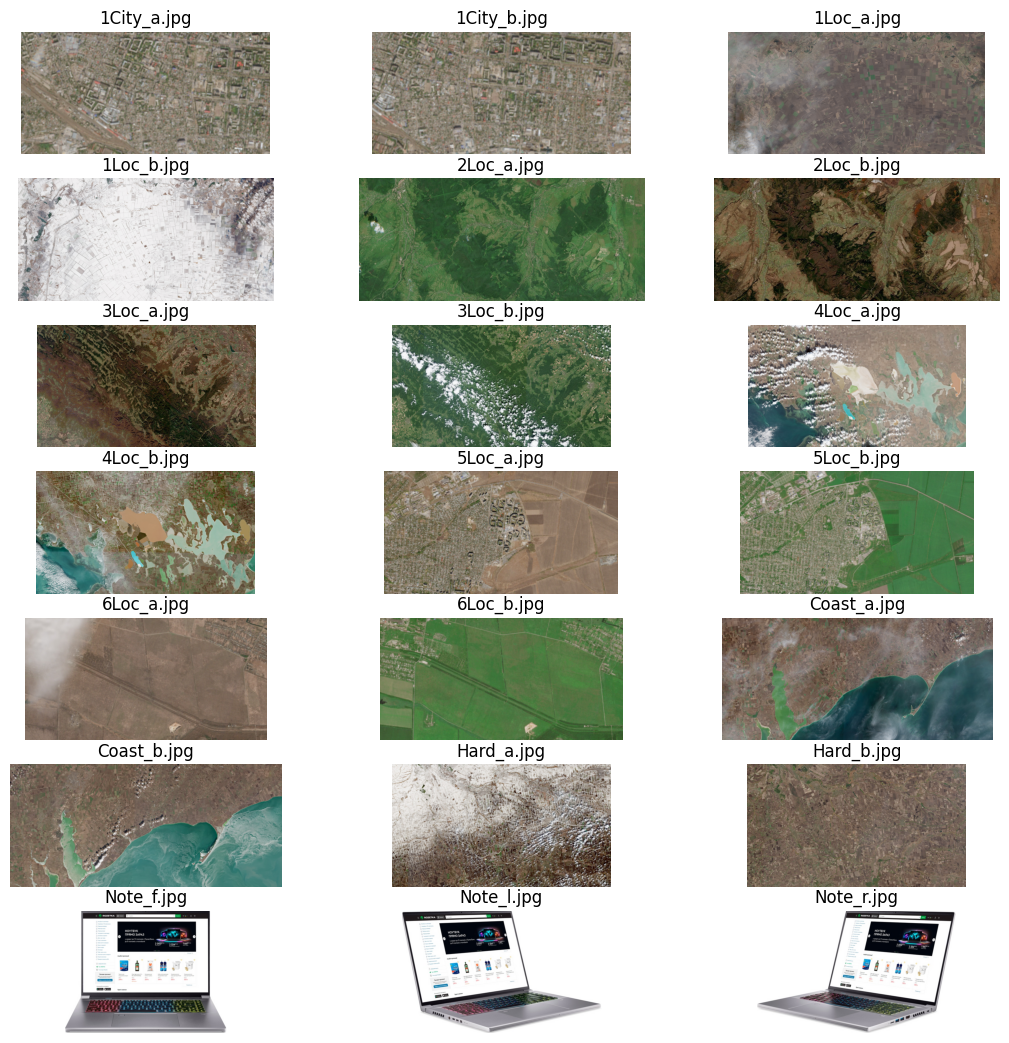

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

folder_path = 'images'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]
image_files = sorted(image_files)

fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(13, 13))
ax = ax.flatten()

for i, image in enumerate(image_files):
    image_path = os.path.join(folder_path, image)
    image = cv2.imread(image_path)
    image_data = np.array(image, dtype=np.uint8)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=None)
    ax[i].axis('off')
    ax[i].set_title(image_files[i])

plt.show()


In [ ]:

from match.viz import plot_matches
from match.roma_matcher import TinyRomaMatcher as tiny_matcher

import torch

ransac_kwargs = {'ransac_thresh':3,
                  'ransac_conf':0.999,
                  'ransac_iters':2000}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
matcher = tiny_matcher()
img_size = 500

Using cache found in /root/.cache/torch/hub/verlab_accelerated_features_main


Matches:  2048
After usac:  222
True matches:  0.1083984375


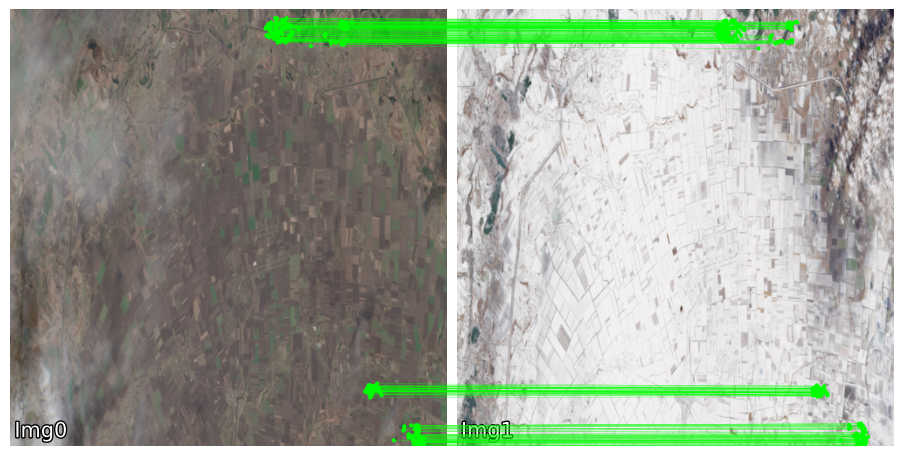

In [ ]:
img0 = matcher.load_image('images/1Loc_a.jpg', resize=img_size)
img1 = matcher.load_image('images/1Loc_b.jpg', resize=img_size)
result = matcher(img0, img1)
plot_matches(img0, img1, result, show_matched_kpts=False, save_path='plot_matches.png')


Matches:  2048
After usac:  215
True matches:  0.10498046875


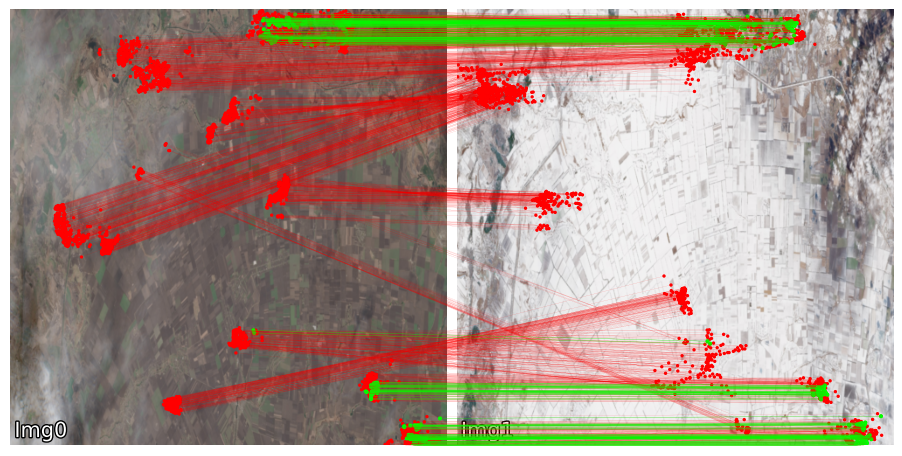

In [ ]:
#all outputs from the model
img0 = matcher.load_image('images/1Loc_a.jpg', resize=img_size)
img1 = matcher.load_image('images/1Loc_b.jpg', resize=img_size)
result = matcher(img0, img1)
plot_matches(img0, img1, result, show_matched_kpts=True, save_path='plot_matches.png')